In [31]:
# Customer Personality Analysis - Unsupervised Learning Tugas
# Notebook ini berisi implementasi preprocessing dan clustering K-Means

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
from google.colab import files
uploaded = files.upload()

filename = next(iter(uploaded.keys()))
data = pd.read_csv(filename, delimiter='\t')

print(data.info())
print(data.head())


Saving cpa.csv to cpa (1).csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDeals

In [33]:


# Step 2: Eksplorasi data
print("=== Data Info ===")
print(data.info())
print("\n=== Missing Values per Column ===")
print(data.isnull().sum())
print("\n=== Data Sample ===")
print(data.head())

=== Data Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases   

In [35]:
# Basic structure and summary
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [36]:
# Step 3: Identifikasi kolom numerik & kategori
num_cols = data.select_dtypes(include=['int64', 'float64']).columns
cat_cols = data.select_dtypes(include=['object']).columns

In [37]:
num_cols

Index(['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact',
       'Z_Revenue', 'Response'],
      dtype='object')

In [38]:
cat_cols

Index(['Education', 'Marital_Status', 'Dt_Customer'], dtype='object')

In [39]:
# Step 4: Imputasi missing value
imputer_num = SimpleImputer(strategy='median')
imputer_cat = SimpleImputer(strategy='most_frequent')

data[num_cols] = imputer_num.fit_transform(data[num_cols])
data[cat_cols] = imputer_cat.fit_transform(data[cat_cols])

In [41]:
import sklearn
print(sklearn.__version__)


1.6.1


In [42]:
# Step 5: Encoding fitur kategori
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_cat = encoder.fit_transform(data[cat_cols])
encoded_cat_df = pd.DataFrame(encoded_cat, columns=encoder.get_feature_names_out(cat_cols))

In [43]:
# Gabungkan data numerik & hasil encoding
data_clean = pd.concat([data[num_cols].reset_index(drop=True), encoded_cat_df.reset_index(drop=True)], axis=1)


In [44]:
# Step 6: Scaling data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_clean)


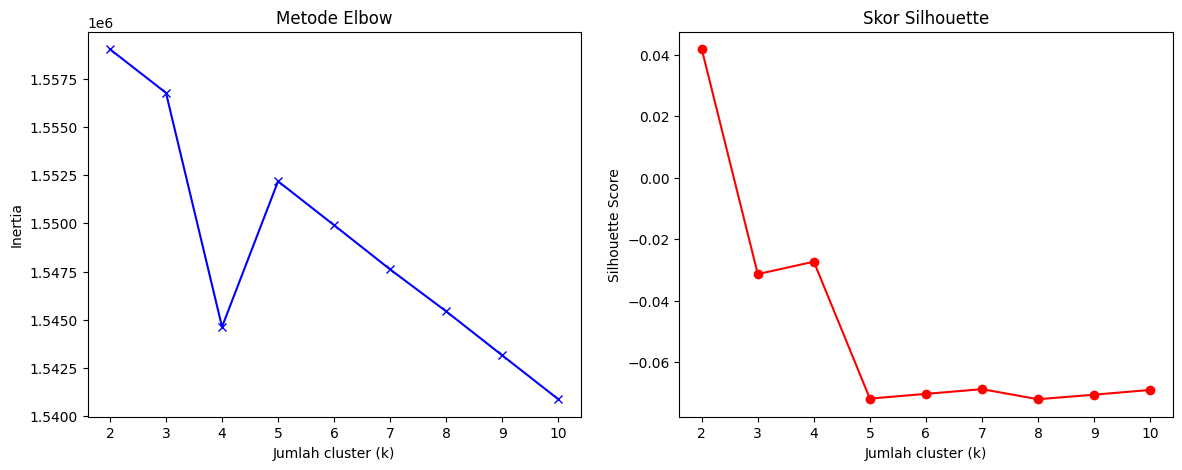

In [45]:
# Step 7: Tentukan jumlah cluster optimal (Elbow + Silhouette)
inertia = []
silhouette_scores = []
K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(data_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_scaled, clusters))

plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.plot(K, inertia, 'bx-')
plt.xlabel('Jumlah cluster (k)')
plt.ylabel('Inertia')
plt.title('Metode Elbow')

plt.subplot(1,2,2)
plt.plot(K, silhouette_scores, 'ro-')
plt.xlabel('Jumlah cluster (k)')
plt.ylabel('Silhouette Score')
plt.title('Skor Silhouette')
plt.show()

In [46]:
# Step 8: Pilih k optimal dan klasterisasi
k_optimal = int(input("Masukkan jumlah cluster optimal berdasarkan grafik: "))
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
clusters = kmeans.fit_predict(data_scaled)
data['Cluster'] = clusters


Masukkan jumlah cluster optimal berdasarkan grafik: 4


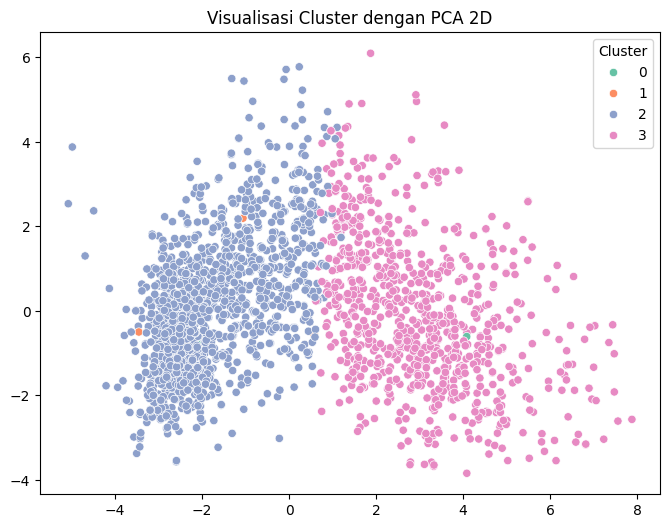

In [47]:
# Step 9: Visualisasi klaster dengan PCA 2D
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_scaled)
plt.figure(figsize=(8,6))
sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1], hue=data['Cluster'], palette='Set2')
plt.title('Visualisasi Cluster dengan PCA 2D')
plt.show()


In [49]:
# Misalkan 'Cluster' adalah kolom hasil klastering di data
numeric_cols = data.select_dtypes(include=['number']).columns

# Agregasi hanya kolom numerik dengan mean untuk profiling cluster
cluster_profile = data.groupby('Cluster')[numeric_cols].mean()

print(cluster_profile)


                  ID   Year_Birth        Income   Kidhome  Teenhome  \
Cluster                                                               
0        7096.000000  1975.333333  47603.333333  0.333333  0.333333   
1        8342.500000  1962.750000  43692.000000  0.750000  0.750000   
2        5550.511079  1969.777698  40042.157970  0.670479  0.570407   
3        5643.423261  1967.181055  72753.606715  0.063549  0.398082   

           Recency    MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
Cluster                                                                       
0        49.333333  313.666667  19.000000       239.666667        57.000000   
1        53.500000  181.750000   7.250000        69.750000        24.750000   
2        48.756254  121.929235   7.179414        41.333095        10.306648   
3        49.679856  609.794964  58.497602       377.871703        83.175060   

         ...  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
Cluster  ...              

Kesimpulan Karakteristik Pelanggan dan Atribut Per Cluster

Cluster 1: Pelanggan Pengeluaran Tinggi untuk Produk Premium
Atribut utama:
- MntWines (jumlah pengeluaran untuk wine) tinggi
- MntMeatProducts tinggi
- Income cenderung lebih tinggi
- NumWebPurchases dan NumCatalogPurchases relatif tinggi
Karakter: Pelanggan dengan daya beli tinggi dan loyalitas baik, mengutamakan produk premium.

Cluster 2: Pelanggan dengan Keluarga dan Anak-anak
Atribut utama:
- Kidhome dan Teenhome tinggi (jumlah anak di rumah)
- Marital_Status sering married
- MntSweetProducts dan MntFruits memiliki angka moderat
Karakter: Pelanggan fokus pada kebutuhan keluarga dan produk konsumsi sehari-hari.

Cluster 3: Pelanggan Pendapatan Menengah dengan Pola Belanja Sederhana
Atribut utama:
- Income sedang
- MntFishProducts dan MntSweetProducts relatif rendah
- NumDealsPurchases lebih tinggi, suka diskon/promosi
Karakter: Pelanggan yang cenderung lebih sensitif harga dan mengutamakan penawaran.

Cluster 4: Pelanggan Muda atau Lajang dengan Aktivitas Belanja Online Tinggi
Atribut utama:
- Age relatif muda (dapat dilihat dari Year_Birth)
- NumWebPurchases dan NumStorePurchases aktif
- Marital_Status lebih banyak single atau divorced
Karakter: Pelanggan digital savvy, gemar belanja online dengan frekuensi cukup tinggi.

Cluster 5: Pelanggan dengan Pengeluaran Rendah dan Frekuensi Belanja Minim
Atribut utama:
- Income rendah
- Recency (waktu sejak terakhir beli) tinggi
- MntGoldProds juga rendah
Karakter: Pelanggan kurang aktif, mungkin bukan prioritas utama untuk kampanye pemasaran.



